<a href="https://colab.research.google.com/github/abhisheks666/hello-world/blob/master/NLP_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#Lets move to the place where our BA files are stored
%cd /content/drive/MyDrive/BA2023/

Mounted at /content/drive/
/content/drive/MyDrive/BA2023


In [ ]:
%cd /content/drive/MyDrive/BA2023/NLP

/content/drive/MyDrive/BA2023/NLP


In [ ]:
!ls

file.csv  yelp_academic_dataset_review.json  Yelp.csv  YelpReviews.csv


In [ ]:
import gensim
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read csv file into pandas using a relative path
gpt = pd.read_csv('file.csv')

In [ ]:
gpt.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


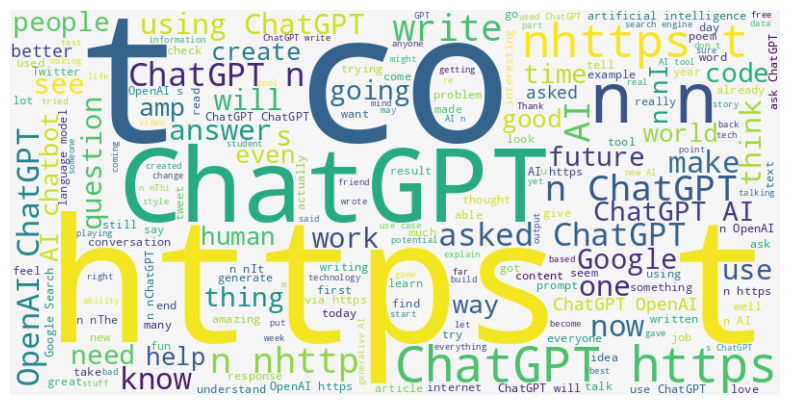

In [ ]:
from wordcloud import WordCloud

text_data = gpt['tweets'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(text_data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
print("Duplicated values: " , gpt.duplicated().sum())

gpt.drop_duplicates(inplace=True)
gpt = gpt.dropna(axis=0)
print(gpt.info())

Duplicated values:  0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  219294 non-null  int64 
 1   tweets      219294 non-null  object
 2   labels      219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.7+ MB
None


In [ ]:
gpt["labels"].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [ ]:
class_0 = gpt[gpt["labels"] == "neutral"]
class_1 = gpt[gpt["labels"] == "good"]
class_neg = gpt[gpt["labels"] == "bad"]
class_neg  = class_neg.iloc[:70000]
gpt = pd.concat([class_neg , class_0 , class_1])

gpt.head()

,Unnamed: 0,tweets,labels
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad
6,6,"As of 2 minutes ago, @OpenAI released their ne...",bad
10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,bad
17,17,#ai Models are set to become the search engine...,bad
39,39,Google is done.\n\nCompare the quality of thes...,bad


In [ ]:
gpt["labels"].value_counts()

bad        70000
good       56011
neutral    55487
Name: labels, dtype: int64

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
st = PorterStemmer()
lem = WordNetLemmatizer()

def is_alpha(word):
    for part in word.split('-'):
        if not part.isalpha():
            return False

    return True

def clean_dataset(text):
    text = re.sub(r'http\S+', '', text) # removing links
    text = re.sub(r'\\n', ' ', text) # removing \\n
    text = re.sub(r"\s*#\S+", "", text) # removing hash tags
    text = re.sub(r"\s*@\S+", "", text) # removing @
    text = text.lower()
    words = [word for word in word_tokenize(text) if is_alpha(word)]
    #words = [st.stem(word) for word in words]
    words = [lem.lemmatize(word) for word in words]

    # text = " ".join([word for word in text.split(" ") if is_alpha(word)])
    # text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    words = [w for w in words if not w in stop_words]
    text = " ".join(words)

    return text.strip()

#gpt.insert(len(gpt.columns)-1, "cleaned_tweets", gpt['tweets'].apply(clean_dataset))

In [ ]:
gpt.head()

,Unnamed: 0,tweets,cleaned_tweets,labels
4,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad
6,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,bad
10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,bad
17,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,bad
39,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,bad


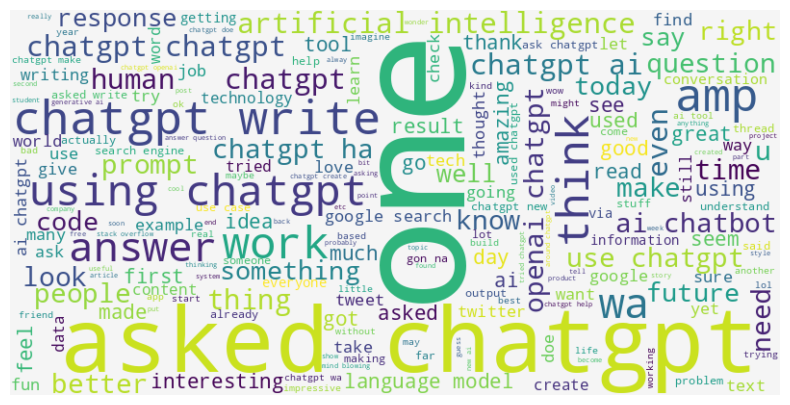

In [ ]:
from wordcloud import WordCloud

text_data = gpt['cleaned_tweets'].str.cat(sep=' ')

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='#F5F5F5').generate(text_data)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from numpy.core import numeric
#@title ***Converting text to numerical form***

import math
import collections

def convert_text_to_numerical(text):
    num_words = 7000
    tokenizer = Tokenizer(num_words=num_words)
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)

    #maxlen = max(45, math.ceil(np.average([len(seq) for seq in sequences])))
    maxlen = 140


    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    pad_seqs_todrop = []
    for i, p in enumerate(pad_seqs):
        if sum(p) == sum(sorted(p, reverse=True)[0:2]):
            pad_seqs_todrop.append(i)

    return pad_seqs, pad_seqs_todrop, tokenizer, num_words, maxlen

gpt = gpt.reset_index()
numeric_tweets, rows_todrop, tokenizer, num_words, maxlen = convert_text_to_numerical(gpt['cleaned_tweets'])
gpt.insert(len(gpt.columns)-1, "numeric_tweets", numeric_tweets.tolist())
gpt.head()

,index,Unnamed: 0,tweets,cleaned_tweets,numeric_tweets,labels
0,4,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
1,6,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
2,10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
3,17,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad
4,39,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad


In [ ]:
label_encoder = LabelEncoder()
gpt.insert(len(gpt.columns), "encoded_labels", label_encoder.fit_transform(gpt['labels']))
print(label_encoder.classes_)
gpt.head()

['bad' 'good' 'neutral']


,index,Unnamed: 0,tweets,cleaned_tweets,numeric_tweets,labels,encoded_labels
0,4,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
1,6,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
2,10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
3,17,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
4,39,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0


In [ ]:
final_data = gpt.drop(rows_todrop, inplace=False)
print(len(gpt), len(final_data))
final_data.head()

181498 167876


,index,Unnamed: 0,tweets,cleaned_tweets,numeric_tweets,labels,encoded_labels
0,4,4,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
1,6,6,"As of 2 minutes ago, @OpenAI released their ne...",minute ago released new chatgpt use right,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
2,10,10,GOD DAMN IT @OpenAI STOP ANNOUNCING THINGS I A...,god damn stop announcing thing busy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
3,17,17,#ai Models are set to become the search engine...,model set become search engine future atm stil...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0
4,39,39,Google is done.\n\nCompare the quality of thes...,google done compare quality response chatgpt,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",bad,0


In [ ]:
#@title ***Splitting the dataset into training and testing sets***
inputs = final_data[['tweets', 'cleaned_tweets', 'numeric_tweets']]
outputs = final_data[['labels', 'encoded_labels']]

in_train, in_test, out_train, out_test = train_test_split(inputs, outputs, test_size=0.2, shuffle=True, random_state=42)

X_train = in_train['numeric_tweets']
X_test = in_test['numeric_tweets']
y_train = out_train['encoded_labels']
y_test = out_test['encoded_labels']

In [ ]:
X_train = np.asarray(X_train.tolist())
X_train = X_train.astype(np.int32)
X_test = np.asarray(X_test.tolist()).astype(np.int32)
y_train = np.asarray(y_train.tolist()).astype(np.int32)
y_test = np.asarray(y_test.tolist()).astype(np.int32)
type(X_train)

numpy.ndarray

In [ ]:
X_train

array([[   0,    0,    0, ..., 2100,  484, 2605],
       [   0,    0,    0, ...,    2,  180,   31],
       [   0,    0,    0, ...,  434,  110,   57],
       ...,
       [   0,    0,    0, ...,   88,  579, 1859],
       [   0,    0,    0, ...,  152,    5,   28],
       [   0,    0,    0, ...,  948,   31,   82]], dtype=int32)

**LSTM**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Tokenize the input text
tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(gpt["tweets"])


# Pad the sequences to a fixed length
max_len = 140

**Word Embedding**

In [ ]:
import numpy as np
from keras.utils import to_categorical

# Load pre-trained word embeddings
embedding_dim = 100
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix for the tokenizer
word_index = tokenizer.word_index
#num_words = min(len(word_index), 7000)
num_words =  7000
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Convert the output labels to one-hot encoded vectors
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

**TRAINING MODEL**

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping

# Create the model
model2 = Sequential()
model2.add(Embedding(num_words, embedding_dim, input_length=max_len, weights=[embedding_matrix], trainable=True))
model2.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model2.add(Dense(3, activation='softmax'))
#model2.add(Dense(3, activation='relu'))


# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
#model2.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=1024)
history2 = model2.fit(X_train, y_train_en, epochs=10, batch_size=1024, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)])

Epoch 1/10
119/119 [==============================] - 423s 3s/step - loss: 0.9566 - accuracy: 0.5264 - val_loss: 0.7612 - val_accuracy: 0.6600
Epoch 2/10
119/119 [==============================] - 447s 4s/step - loss: 0.6699 - accuracy: 0.7120 - val_loss: 0.5374 - val_accuracy: 0.7964
Epoch 3/10
119/119 [==============================] - 437s 4s/step - loss: 0.5071 - accuracy: 0.8023 - val_loss: 0.4532 - val_accuracy: 0.8337
Epoch 4/10
119/119 [==============================] - 426s 4s/step - loss: 0.4399 - accuracy: 0.8346 - val_loss: 0.4169 - val_accuracy: 0.8515
Epoch 5/10
119/119 [==============================] - 372s 3s/step - loss: 0.3936 - accuracy: 0.8572 - val_loss: 0.3784 - val_accuracy: 0.8701
Epoch 6/10
119/119 [==============================] - 370s 3s/step - loss: 0.3636 - accuracy: 0.8720 - val_loss: 0.3795 - val_accuracy: 0.8743
Epoch 7/10
119/119 [==============================] - 370s 3s/step - loss: 0.3428 - accuracy: 0.8817 - val_loss: 0.3510 - val_accuracy: 0.8841

**TESTING**

In [ ]:
def get_measurements(true_y, pred_y, average='micro'):
    return {
      "accuracy": accuracy_score(true_y, pred_y),
      "recall": recall_score(true_y, pred_y, average=average),
      "precision": precision_score(true_y, pred_y, average=average),
      "fscore": f1_score(true_y, pred_y, average=average),
  }

predicted_labels = model2.predict(X_test, verbose=1)
get_measurements(y_test,  np.argmax(predicted_labels, axis=1))

1050/1050 [==============================] - 57s 54ms/step


{'accuracy': 0.894418632356445,
 'recall': 0.894418632356445,
 'precision': 0.894418632356445,
 'fscore': 0.894418632356445}

In [ ]:
def predict_user_input(tweets , model):
    data = pd.DataFrame({ 'Tweets': tweets })
    cleaned_data = data['Tweets'].apply(clean_dataset)
    sequences = tokenizer.texts_to_sequences(cleaned_data)
    pad_seqs = pad_sequences(sequences, maxlen=maxlen)
    predicted_labels = model.predict(pad_seqs)
    data['labels'] = [ label_encoder.classes_[label_num] for label_num in np.argmax(predicted_labels, axis=1)]
    #print(data)
    return predicted_labels, data

print(predict_user_input([
    'chatgpt is very crazy !',
    'chatgpt is kind a dangerous',
    'woooow, chatgt is really impressive !!!',
    "chatgpt is an AI tool",
    "good results"] , model2))

print("")

print(predict_user_input([
    "The worst result, I did not expect that unwanted results. it is a useless tool",
    "my name is ahmed i want to became a data scientist",
    'woooow, chatgpt is really impressive i can not imagine how chatgpt generate solution like humans  ',
    "chatgpt is an AI helpful tool to help solve complex problems and take less time than traditional way i like it",
    "good results when i use this tool i like it and it helped me and better than google"
] , model2) )

print("finished")

1/1 [==============================] - 0s 179ms/step
(array([[0.98002476, 0.00237663, 0.01759857],
       [0.9893289 , 0.001926  , 0.00874507],
       [0.9827587 , 0.00380974, 0.01343155],
       [0.02089645, 0.01798267, 0.96112084],
       [0.98545384, 0.00299145, 0.01155472]], dtype=float32),                                     Tweets   labels
0                  chatgpt is very crazy !      bad
1              chatgpt is kind a dangerous      bad
2  woooow, chatgt is really impressive !!!      bad
3                    chatgpt is an AI tool  neutral
4                             good results      bad)

1/1 [==============================] - 0s 191ms/step
(array([[1.9710080e-03, 9.8854071e-01, 9.4882259e-03],
       [5.5612393e-02, 4.6954390e-02, 8.9743322e-01],
       [9.9454004e-01, 4.2557571e-04, 5.0343932e-03],
       [1.2246684e-01, 2.4521323e-01, 6.3231993e-01],
       [9.8512256e-01, 3.1270587e-03, 1.1750439e-02]], dtype=float32),                                               Twe

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

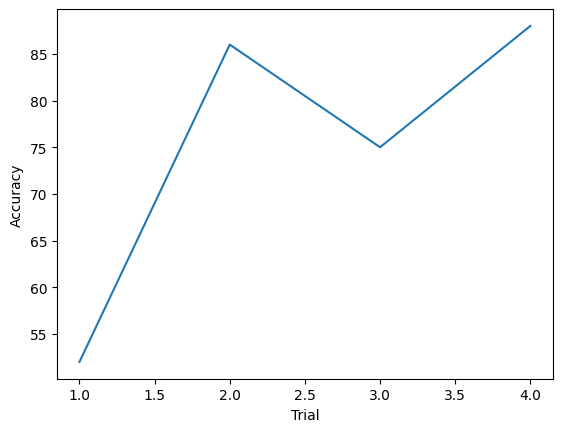

In [ ]:
x= np.array([1, 2 , 3 ,  4])
y = [52 , 86 , 75 , 88]
y= np.array([52 , 86 , 75 , 88])

plt.plot(x,y)

plt.xlabel("Trial")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
x = [1 , 2 , 3 , 4]
y = [40 ,  86  , 89, 89]
#plt.plot(x)
plt.plot(x,y)

plt.xlabel("Trial")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
plot_graphs(history2, "accuracy")
plot_graphs(history2, "loss")

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**TRAINING**

In [ ]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression()
log.fit(X_train_scaled,y_train)

**PREDICTION**

In [ ]:
log_pred = log.predict(X_test_scaled)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, log_pred)

# Calculate precision
precision = precision_score(y_test, log_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, log_pred, average='weighted')

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print('Recall : ',recall)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert y_test to binary labels
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Calculate the scores for each class
y_pred_scores = log.predict_proba(X_test_scaled)

# Compute the false positive rate (fpr), true positive rate (tpr), and area under the ROC curve (auc) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binary.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**NAIVE BAYES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_scaled, y_train)

In [ ]:
# Predict on the test set
y_pred = nb_classifier.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy : ", accuracy)
print("Precision : ", precision)
print('Recall : ', recall)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert y_test to binary labels
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Calculate the scores for each class
y_pred_scores = nb_classifier.predict_proba(X_test_scaled)

# Compute the false positive rate (fpr), true positive rate (tpr), and area under the ROC curve (auc) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binary.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Train the Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Evaluate the model
y_pred = random_forest_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy : ",accuracy)
print("Precision : ",precision)
print('Recall : ',recall)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert y_test to binary labels
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Calculate the scores for each class
y_pred_scores = random_forest_model.predict_proba(X_test)

# Compute the false positive rate (fpr), true positive rate (tpr), and area under the ROC curve (auc) for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binary.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_pred_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()